In [1]:
import brainpy as bp
import brainpy.numpy as np
import bpmodels
import matplotlib.pyplot as plt

bp.profile.set(backend="numba", device='cpu', dt=.1, merge_steps=True)

In [2]:
def run_neuron(neu_type, I_ext=10., duration=100., ylim=False, title=''):
    neuron = bp.NeuGroup(neu_type, 1, monitors=['V'])

    neuron.run(duration=duration, inputs=["ST.input", I_ext])

    fig, gs = bp.visualize.get_figure(1, 1, 3, 9)

    fig.add_subplot(gs[0, 0])
    plt.plot(neuron.mon.ts, neuron.mon.V[:, 0], label='V')
    plt.ylabel('Membrane potential')
    plt.xlabel('Time (ms)')
    plt.xlim(-0.1, duration + 0.1)
    if ylim:
        plt.ylim(-95., 40.)
    plt.title(neu_type.name+title)
    plt.legend()

    plt.show()

Test all IF models with default parameters.

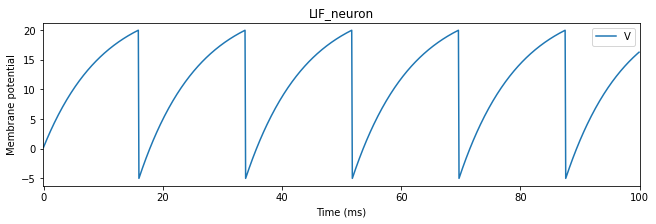

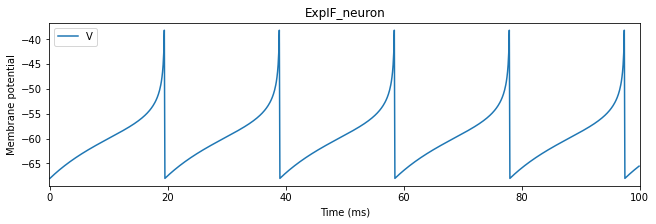

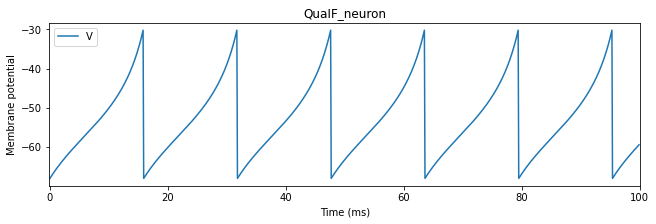

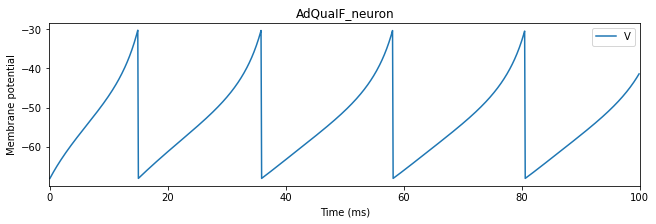

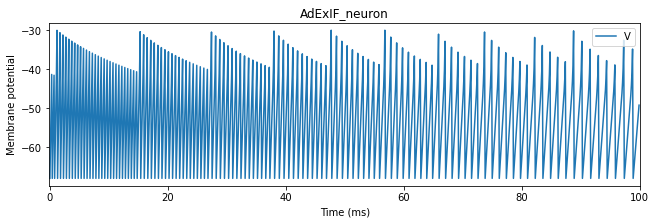

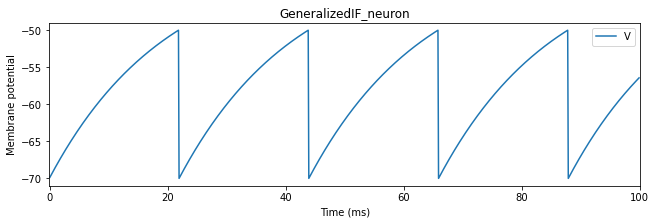

In [3]:
t_refractory=0.

LIF = bpmodels.neurons.get_LIF(t_refractory=t_refractory)
run_neuron(LIF, I_ext=25., duration=100.)

expIF = bpmodels.neurons.get_ExpIF(t_refractory=t_refractory)
run_neuron(expIF, I_ext=.8, duration=100.)

QIF = bpmodels.neurons.get_QuaIF(t_refractory=t_refractory)
run_neuron(QIF, I_ext=20., duration=100.)

aQIF = bpmodels.neurons.get_AdQuaIF(t_refractory=t_refractory)
run_neuron(aQIF, I_ext=25., duration=100.)

aEIF = bpmodels.neurons.get_AdExIF(t_refractory=t_refractory)
run_neuron(aEIF, I_ext=50., duration=100.)

gIF = bpmodels.neurons.get_GeneralizedIF()
run_neuron(gIF, I_ext=1.5, duration=100.)

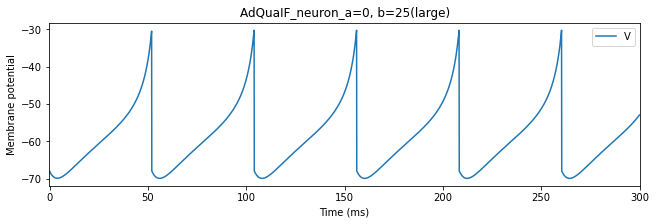

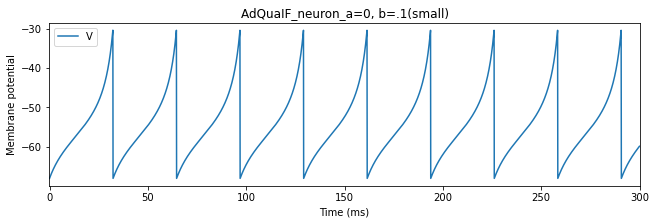

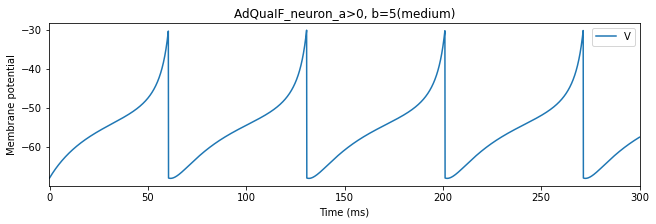

In [4]:
# test AdQuaIF
t_refractory=0.

# a=0, large b
aQIF = bpmodels.neurons.get_AdQuaIF(a=0, b=25, t_refractory=t_refractory)
run_neuron(aQIF, I_ext=10., duration=300., title='_a=0, b=25(large)')

# a=0, small b
aQIF = bpmodels.neurons.get_AdQuaIF(a=0, b=.1, t_refractory=t_refractory)
run_neuron(aQIF, I_ext=10., duration=300., title='_a=0, b=.1(small)')

# a>0, medium b
aQIF = bpmodels.neurons.get_AdQuaIF(a=.5, b=5, t_refractory=t_refractory)
run_neuron(aQIF, I_ext=10., duration=300., title='_a>0, b=5(medium)')

#!!!problem!!!: a=0 -- no adaptation?
# note that a < 1. (a determines adaptation??)

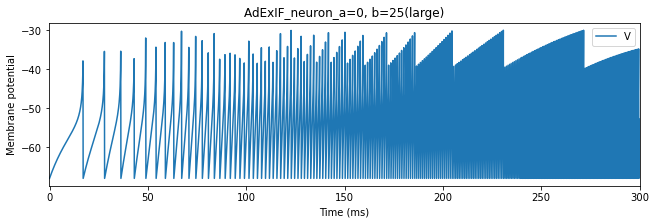

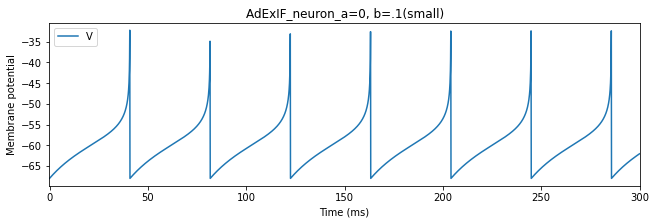

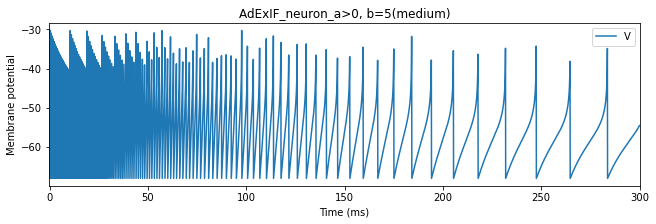

In [8]:
# test AdExIF
t_refractory=0.

# a=0, large b
aEIF = bpmodels.neurons.get_AdExIF(a=0, b=25, t_refractory=t_refractory)
run_neuron(aEIF, I_ext=.5, duration=300., title='_a=0, b=25(large)')

# a=0, small b
aEIF = bpmodels.neurons.get_AdExIF(a=0, b=.1, t_refractory=t_refractory)
run_neuron(aEIF, I_ext=15., duration=300., title='_a=0, b=.1(small)')

# a>0, medium b
aEIF = bpmodels.neurons.get_AdExIF(a=1, b=5, t_refractory=t_refractory)
run_neuron(aEIF, I_ext=.5, duration=300., title='_a>0, b=5(medium)')

#!!!problem!!!: larger a --> more delay?? (a<0 -> adaptation)

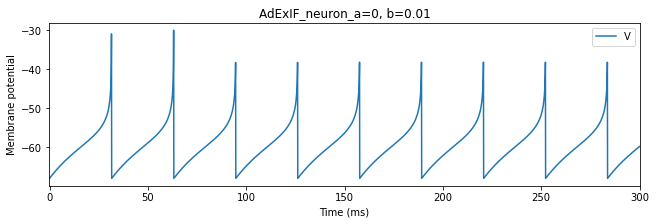

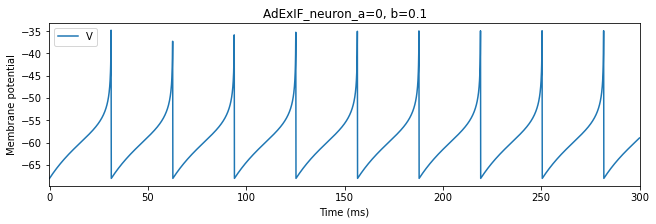

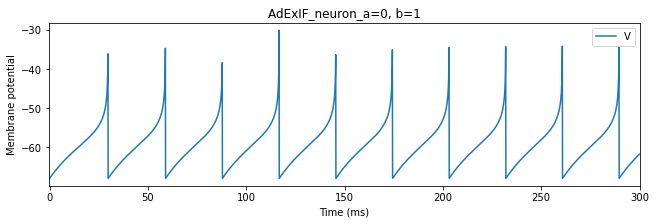

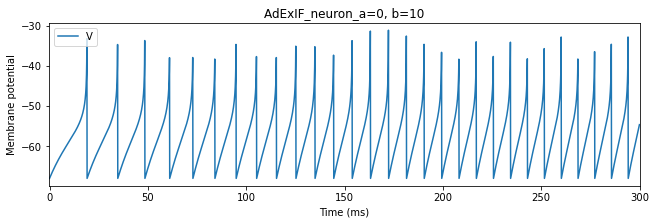

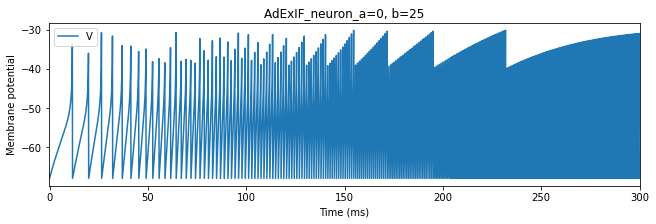

In [10]:
# test b
t_refractory=0.

# a=0, large b
bs=[.01, .1, 1, 10, 25]
for b in bs:
    aEIF = bpmodels.neurons.get_AdExIF(a=0, b=b, t_refractory=t_refractory)
    run_neuron(aEIF, I_ext=20., duration=300., title='_a=0, b='+str(b))
    #aQIF = bpmodels.neurons.get_AdQuaIF(a=0, b=b, t_refractory=t_refractory)
    #run_neuron(aQIF, I_ext=15., duration=300., title='_a=0, b='+str(b))

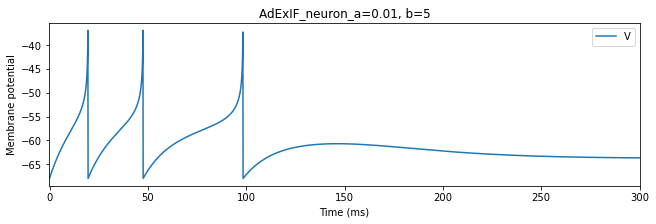

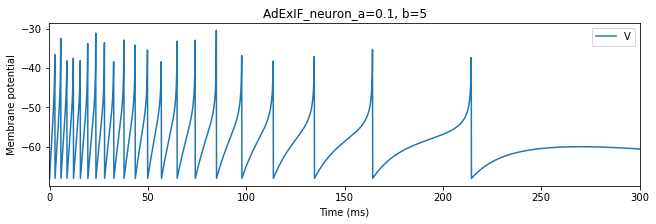

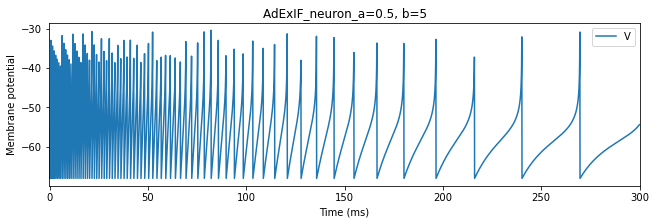

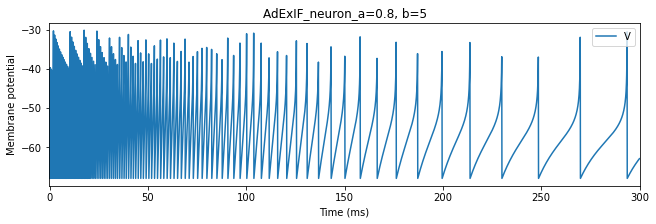

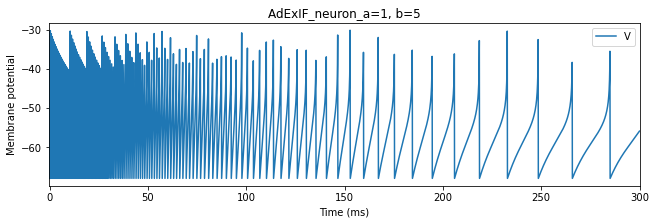

In [9]:
ass=[.01, .1, .5, .8, 1]
for a in ass:
    aEIF = bpmodels.neurons.get_AdExIF(a=a, b=5, t_refractory=t_refractory)
    run_neuron(aEIF, I_ext=.1, duration=300., title='_a='+str(a)+', b=5')
    #aQIF = bpmodels.neurons.get_AdQuaIF(a=a, b=5, t_refractory=t_refractory)
    #run_neuron(aQIF, I_ext=20., duration=300., title='_a='+str(a)+', b=5(medium)')

Test AdEx IF neuron model.

In [ ]:
patterns = dict(tonic = [20, 0.0, 30.0, .6, -55],
                adapting = [20, 0., 100, .05, -55],
                init_bursting = [5., .5, 100, .07, -51],
                bursting = [5., -.5, 100, .07, -46],
                irregular = [9.9, -.5, 100, .07, -46],
                transient = [10, 1., 100, .1, -60],
                delayed = [5, -1, 100, .1, -60])

for i in patterns:
    print(i)
    i = patterns[i]
    neu = bpmodels.neurons.get_AdExIF(tau=i[0],
                                        a=-i[1],
                                        tau_w=i[2],
                                        b=i[3],
                                        V_reset=-70,
                                        V_rest=-70,
                                        R=.5,
                                        delta_T=2.,
                                        V_th=-i[4],
                                        V_T=-50)
    run_neuron(neu, I_ext=65, duration=300.)